In [139]:
#Restart the session and to remove all the temporary variables from the interactive development environment.
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [140]:
#import necessary libraries
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [142]:
#load our data
data = pd.read_csv('D:/Work/Mine/Python/Python/fraud_data.csv')
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [144]:
#take a look at the response variable
data.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

from the above information, we establish that there is an inbalance in our response dataset.

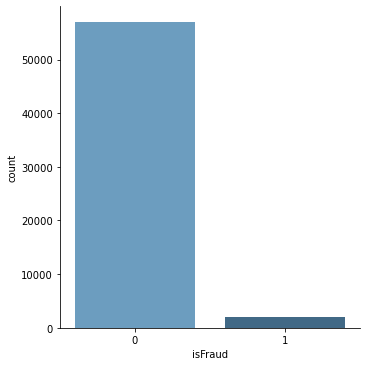

In [145]:
sns.catplot(x = 'isFraud', kind='count', palette ='Blues_d', data=data)

# Missing Values

In [146]:
# Get the list of columns with and without missing values
missing_values = data.isnull().any()
missing_values

TransactionID     False
isFraud           False
TransactionDT     False
TransactionAmt    False
ProductCD         False
                  ...  
id_36              True
id_37              True
id_38              True
DeviceType         True
DeviceInfo         True
Length: 434, dtype: bool

In [147]:
# Get the percentage for missing values
percent_missing_values = data.isnull().sum()/len(data) * 100
percent_missing_values

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             75.945745
id_37             75.945745
id_38             75.945745
DeviceType        75.979612
DeviceInfo        79.813391
Length: 434, dtype: float64

In [148]:
data.isnull().mean()

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
id_36             0.759457
id_37             0.759457
id_38             0.759457
DeviceType        0.759796
DeviceInfo        0.798134
Length: 434, dtype: float64

In [149]:
# We are keeping columns with missing values less than 20%
data = data[data.columns[data.isnull().mean() < 0.2]]
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,234.000000,0.000000,225.500000,0.000000,288.000000,1707.000000,1707.000000,0.0,0.0,0.0
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,0.000000,0.000000,73.772797,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,0.000000,0.000000,99.900002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3549150,0,14898396,335.000,W,2616,327.0,150.0,discover,102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59050,3497600,0,13371647,20.950,W,3277,111.0,150.0,visa,226.0,...,47.950001,47.950001,138.850006,47.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0
59051,3575755,0,15775109,59.000,W,9486,127.0,150.0,mastercard,224.0,...,0.000000,49.000000,49.000000,49.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59052,3521246,0,14071016,25.950,W,2392,360.0,150.0,mastercard,126.0,...,25.950001,25.950001,25.950001,25.950001,51.900002,51.900002,51.900002,0.0,0.0,0.0


In [150]:
# Get numerical columns
num_cols = data.select_dtypes(include=np.number).columns

# fill the missing values with the mean
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [151]:
# Get categorical columns
cat_cols = data.select_dtypes(include = 'object').columns

# fill the missing values with the mode
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

'''The .iloc[0] above selects the first mode returned in case there are other values with same highest frequency of occurrence.'''


'The .iloc[0] above selects the first mode returned in case there are other values with same highest frequency of occurrence.'

In [152]:
# Let's check for missing values again 
data.isnull().mean()

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 182, dtype: float64

# One Hot Encoding

In [153]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,234.000000,0.000000,225.500000,0.000000,288.000000,1707.000000,1707.000000,0.0,0.0,0.0
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,0.000000,0.000000,73.772797,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,0.000000,0.000000,99.900002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3549150,0,14898396,335.000,W,2616,327.0,150.0,discover,102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59050,3497600,0,13371647,20.950,W,3277,111.0,150.0,visa,226.0,...,47.950001,47.950001,138.850006,47.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0
59051,3575755,0,15775109,59.000,W,9486,127.0,150.0,mastercard,224.0,...,0.000000,49.000000,49.000000,49.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59052,3521246,0,14071016,25.950,W,2392,360.0,150.0,mastercard,126.0,...,25.950001,25.950001,25.950001,25.950001,51.900002,51.900002,51.900002,0.0,0.0,0.0


In [154]:
'''One Hot Encoding is a technique or strategy for converting categorical values (Nominal) into binary values. Here, a new column is created for each categorical value and assigned either 0 or 1 depending on the postion of the said value in the main column. We can import 'OneHotEncoder' from sklearn.preprocessing or use pandas's get_dummies() function.'''

"One Hot Encoding is a technique or strategy for converting categorical values (Nominal) into binary values. Here, a new column is created for each categorical value and assigned either 0 or 1 depending on the postion of the said value in the main column. We can import 'OneHotEncoder' from sklearn.preprocessing or use pandas's get_dummies() function."

In [155]:
data = pd.get_dummies(data, columns = cat_cols)

In [156]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,1,0,0,0,0,0


# Split data into Predictor and Response Variable

In [157]:
# X is the predictor variables whilst Y is the response variable and remove the TransactionID column.
X = data.drop(columns =['isFraud','TransactionID'])
Y = data['isFraud']

# Standardization & Normalization

In [158]:
''' The purpose of standardization and Normalization is to bring the data to a common scale. Standardization brings data to a range where the mean is 0 and standard deviation is 1. Normalization on the other hand brings data to a close range. We use the StandardScaler from the sklearn.preprocessing library to achieve this result.'''

' The purpose of standardization and Normalization is to bring the data to a common scale. Standardization brings data to a range where the mean is 0 and standard deviation is 1. Normalization on the other hand brings data to a close range. We use the StandardScaler from the sklearn.preprocessing library to achieve this result.'

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaled_data = StandardScaler().fit_transform(X)
scaled_data = pd.DataFrame(data = scaled_data )
scaled_data.columns = X.columns.values

In [161]:
scaled_data

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,-0.099186,-0.092969,...,-0.021387,-0.022918,-0.009202,-0.004115,2.216281,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
1,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,-0.099186,-0.071893,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
2,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,-0.099186,-0.078918,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
3,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,-0.099186,-0.092969,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
4,1.053404,-0.438389,-0.185621,0.580022,-0.286861,0.653753,-0.278162,0.077832,-0.082944,-0.078918,...,-0.021387,-0.022918,-0.009202,-0.004115,2.216281,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,1.632727,0.861640,-1.490574,-0.226970,-0.286861,-2.360305,0.358438,0.077832,-0.082944,-0.092969,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
59050,1.301690,-0.485576,-1.355501,-1.610384,-0.286861,0.653753,-0.622553,0.077832,0.850995,0.574433,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
59051,1.822820,-0.322349,-0.086718,-1.507909,-0.286861,0.605139,0.379310,0.077832,-0.099186,-0.092969,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253
59052,1.453331,-0.464127,-1.536347,-0.015615,-0.286861,-1.776939,1.861232,0.077832,-0.074822,-0.057842,...,-0.021387,-0.022918,-0.009202,-0.004115,-0.451206,-0.053413,-0.013649,-0.014839,-0.015399,-0.06253


# Split Data into Train & Test data

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

# Dealing with Imbalanced Data

#### There are five different ways of dealing with data imbalance in Machine Learning. 
1. We can change the performance metric ie. use Confusion Matrix, Precision, Recall and F1 Score and not accuracy.
2. We can change the algorithm. NB: Decision trees frequently perform better with imbalanced datasets.
3. Oversample Minority Class.
4. Undersample Majority Class.
5. Imblearn SMOTE.

#### NB: 
Before you do any Oversampling techniques, you must spslit your data into train and test datasets!
This is to avoid the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [171]:
# We use imblearn's SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [175]:
np.unique(Y_train, return_counts = True)

(array([0, 1], dtype=int64), array([39942, 39942], dtype=int64))

#### We see from above that the count of both classes are equal.